In [67]:
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
eeci_colors = ['#E50068','#574145','#009070','#7500a0','#ffbfeb','#00C8A4','#a800e5','#4d4e51','#BEA5A9','#ebf1f7']

In [69]:
results_file = os.path.join('..','results', 'prediction_tests_baseline.csv')
comp_results = pd.read_csv(results_file)

In [70]:
print(comp_results)

   Model Name   Train Building  Forecast Time (s)  Tau (hrs)   Metric  \
0      linear  same-train-test          29.411585         48   gmnMAE   
1      linear  same-train-test          29.411585         48  gmnRMSE   
2      resmlp  same-train-test          73.376906         48   gmnMAE   
3      resmlp  same-train-test          73.376906         48  gmnRMSE   
4        conv  same-train-test         146.009109         48   gmnMAE   
5        conv  same-train-test         146.009109         48  gmnRMSE   
6         TFT  same-train-test       15222.943571         48   gmnMAE   
7         TFT  same-train-test       15222.943571         48  gmnRMSE   
8       NHiTS  same-train-test       15288.875254         48   gmnMAE   
9       NHiTS  same-train-test       15288.875254         48  gmnRMSE   
10     DeepAR  same-train-test       74991.387847         48   gmnMAE   
11     DeepAR  same-train-test       74991.387847         48  gmnRMSE   

           P         C         S        L0        

In [71]:
models = ['linear', 'conv', 'resmlp', 'TFT', 'NHiTS', 'DeepAR']
model_names = ['Linear', 'Conv', 'ResMLP', 'TFT', 'NHiTS', 'DeepAR']
UCam_ids = [0,3,9,11,12,15,16,25,26,32,38,44,45,48,49]
columns = ['P','C','S',*['L%s'%id for id in UCam_ids]]

In [72]:
xrake = 0.25

## Plot prediction performance of models for pricing, carbon, and solar variables.

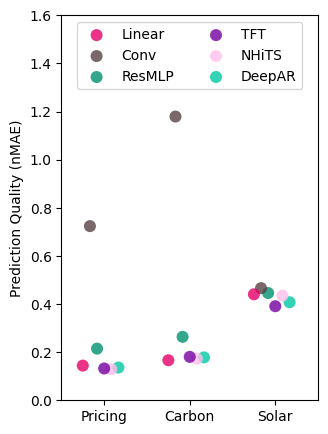

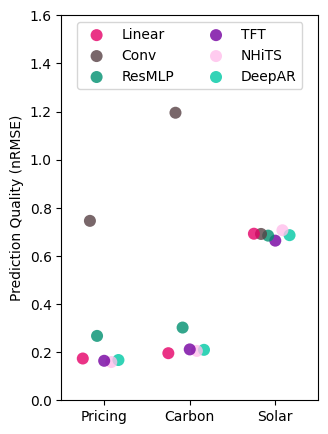

In [73]:
for metric, metric_name, ymax in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE'],[1.6,1.6]):
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_box_aspect(1.5)
    for i,model in enumerate(models):
        ax.scatter(
            [x + ((2*i/len(models) - 1))*xrake for x in range(3)],
            comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][columns[:3]],
            label=model_names[i],
            zorder=len(models)-i,
            color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
        )
    plt.xticks(range(3),['Pricing','Carbon','Solar'])
    plt.ylim(0,ymax)
    plt.xlim(-0.5,2.5)
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2, fancybox=True)
    plt.show()

## Plot prediction performance of models for building load variables.

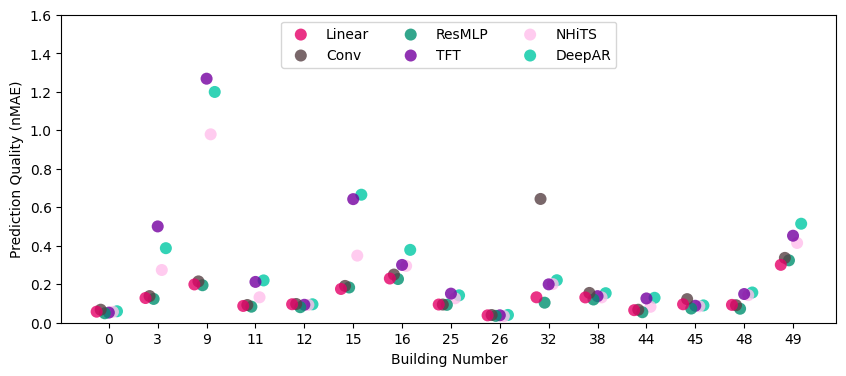

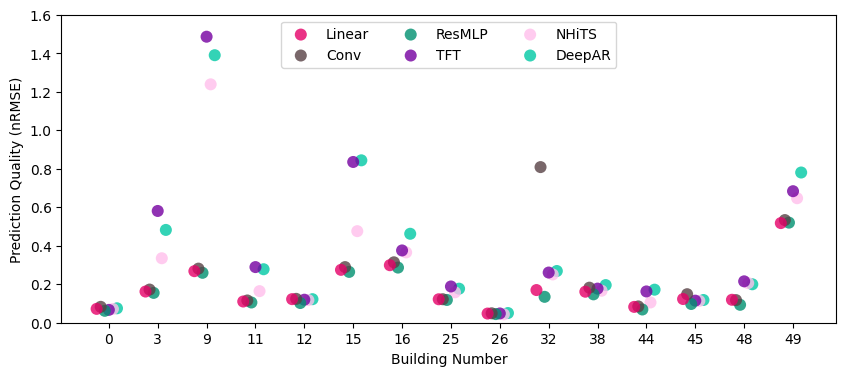

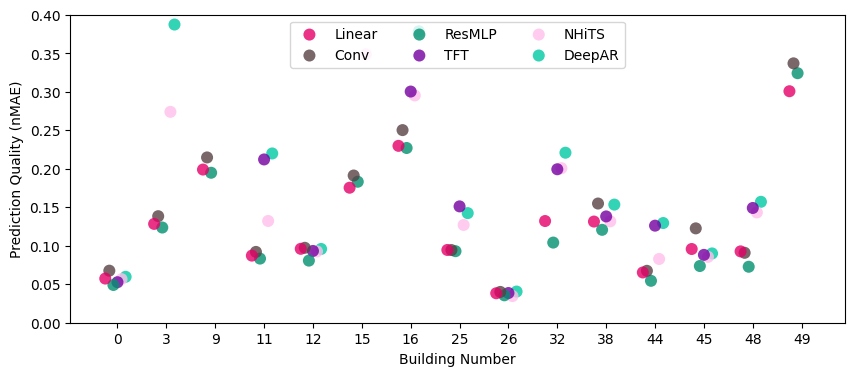

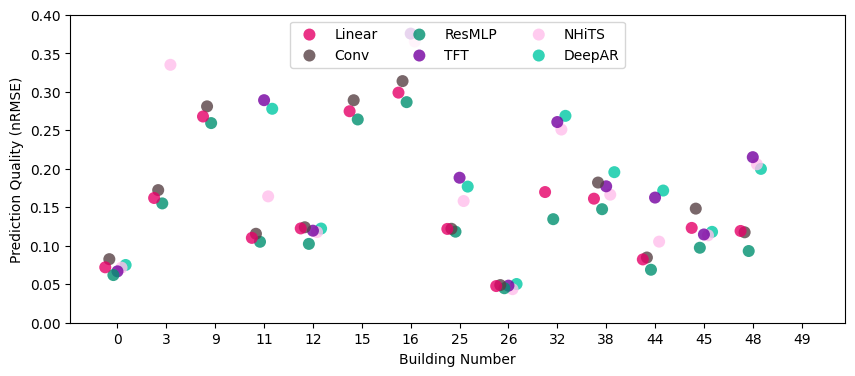

In [74]:
for ylim in [1.6,0.4]:
    for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
        fig, ax = plt.subplots(figsize=(10,4))
        for i,model in enumerate(models):
            ax.scatter(
                [x + ((2*i/len(models) - 1))*xrake for x in range(len(UCam_ids))],
                comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][columns[3:]],
                label=model_names[i],
                zorder=len(models)-i,
                color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
            )
        plt.xticks(range(len(UCam_ids)),UCam_ids)
        plt.ylim(0,ylim)
        plt.ylabel(f'Prediction Quality ({metric_name})')
        plt.xlabel('Building Number')
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
        plt.show()

## Plot model building load performance against buidling train-test dataset similarities

In [75]:
sim_results_file = os.path.join('..','data','analysis','correlations','dataset_similarities.csv')
dataset_sims = pd.read_csv(sim_results_file)

In [76]:
print(dataset_sims)

         Unnamed: 0     B0     B3     B9    B11    B12    B15    B16    B25  \
0  train_validation  0.213  0.600  0.412  0.215  0.537  0.851  0.633  0.453   
1   validation_test  0.256  0.721  1.622  0.319  0.328  0.319  0.571  0.345   
2        train_test  0.249  1.041  1.426  0.362  0.621  0.905  0.508  0.690   

     B26    B32    B38    B44    B45    B48    B49  
0  0.281  0.184  0.783  0.202  0.245  0.390  0.422  
1  0.295  0.219  0.518  0.263  0.312  0.151  0.722  
2  0.319  0.244  1.157  0.281  0.266  0.408  0.658  


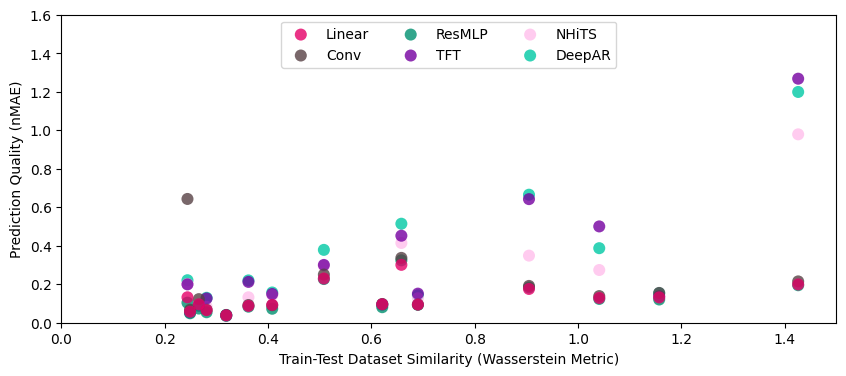

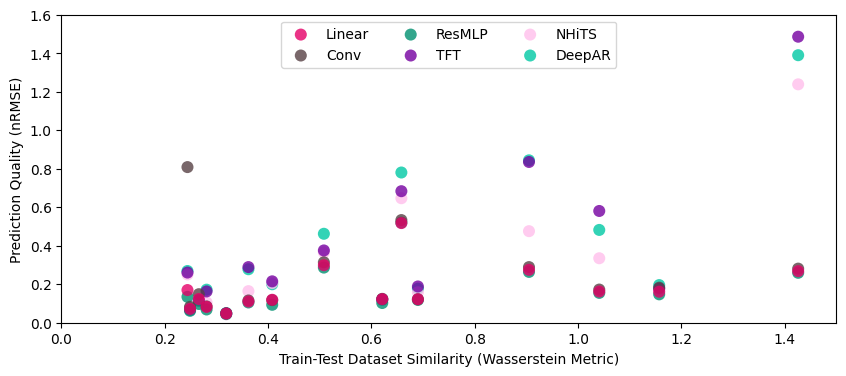

In [77]:

for metric, metric_name in zip(['gmnMAE','gmnRMSE'],['nMAE','nRMSE']):
    fig, ax = plt.subplots(figsize=(10,4))
    for i,model in enumerate(models):
        ax.scatter(
            dataset_sims.iloc[2][1:], # train_test row
            comp_results[(comp_results['Model Name']==model) & (comp_results['Metric']==metric)][columns[3:]],
            label=model_names[i],
            zorder=len(models)-i,
            color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
        )
    plt.xlim(0,1.5)
    plt.ylim(0,1.6)
    plt.ylabel(f'Prediction Quality ({metric_name})')
    plt.xlabel('Train-Test Dataset Similarity (Wasserstein Metric)')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True)
    plt.show()

## Plot control performance of models

In [78]:
eval_file = os.path.join('..','results', 'evaluate_tests_baseline.csv')
eval_results = pd.read_csv(eval_file)

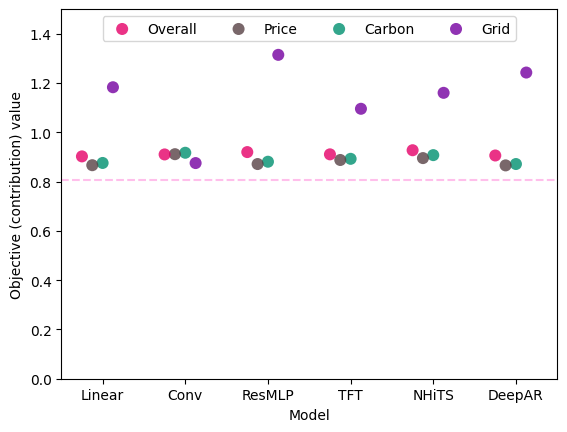

In [79]:
columns = ['Overall','Price','Carbon','Grid']

fig, ax = plt.subplots()
for i,col in enumerate(columns):
    ax.scatter(
        [x + ((2*i/len(columns) - 1))*xrake for x in range(len(models))],
        [eval_results[col][eval_results['Model']==model] for model in models],
        label=col,
        zorder=len(columns)-i,
        color=eeci_colors[i], alpha=0.8, edgecolors='none',s=75
    )
ax.hlines([0.8068829133338647], xmin=-0.5, xmax=len(models)-0.5, colors=eeci_colors[4], ls='--', alpha=1)
plt.xticks(range(len(models)),model_names)
plt.xlabel('Model')
plt.xlim(-0.5,len(models)-0.5)
plt.ylim(0,1.5)
plt.ylabel(f'Objective (contribution) value')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=4, fancybox=True)
plt.show()